# Install all Requirements

In [2]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 15.3 MB/s eta 0:00:00a 0:00:01


# Import Libraries

In [3]:
#Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

In [25]:
import glob
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from skimage.io import  imread, imshow
from skimage.transform import  resize, rescale
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the Data

## Train Data

In [5]:
traindata_gen = ImageDataGenerator(zoom_range=0.5, shear_range=0.8, horizontal_flip=True, rescale=1/255)

In [6]:
path='../input/traffic-sign-dataset-classification/traffic_Data/DATA'
data_train_gen =traindata_gen.flow_from_directory(
    directory=path,
    target_size=(224,224),
    batch_size=3,
    class_mode="categorical",
    color_mode='rgb',
    seed = 1234,
    shuffle = True
    )

Found 4170 images belonging to 58 classes.


In [7]:
data_train_gen.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '30': 24,
 '31': 25,
 '32': 26,
 '33': 27,
 '34': 28,
 '35': 29,
 '36': 30,
 '37': 31,
 '38': 32,
 '39': 33,
 '4': 34,
 '40': 35,
 '41': 36,
 '42': 37,
 '43': 38,
 '44': 39,
 '45': 40,
 '46': 41,
 '47': 42,
 '48': 43,
 '49': 44,
 '5': 45,
 '50': 46,
 '51': 47,
 '52': 48,
 '53': 49,
 '54': 50,
 '55': 51,
 '56': 52,
 '57': 53,
 '6': 54,
 '7': 55,
 '8': 56,
 '9': 57}

## Test Data

In [8]:
all_images = []
for img_path in glob.glob("../input/traffic-sign-dataset-classification/traffic_Data/TEST/*"):
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0  # divide by 255.0 to get float values between 0 and 1 (Rescale)
    all_images.append(img_array)

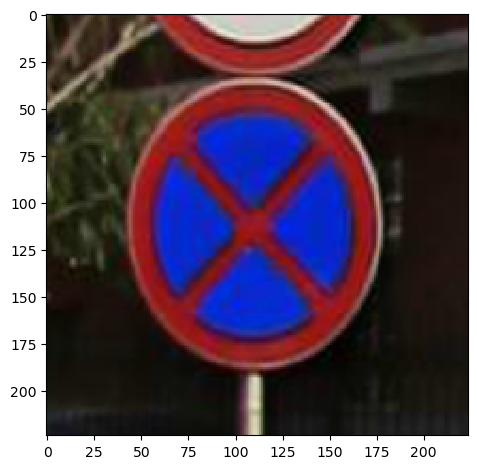

In [9]:
imshow(all_images[40])

# Import the Model

In [10]:
ResNet50_model = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(224,224,3))

94765736/94765736 [==============================] - 1s 0us/step


# Model Architecture

In [11]:
# to make this notebook's output stable across runs

def reset_graph(seed=41):
    tf.random.set_seed(seed)
    np.random.seed(seed) 

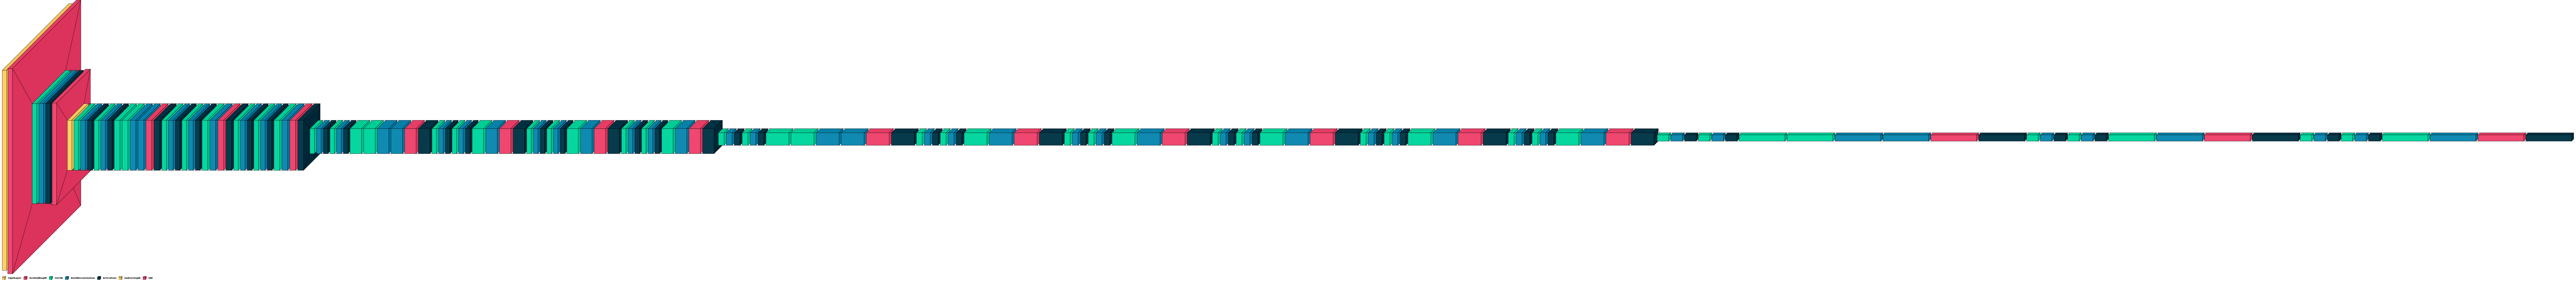

In [12]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(ResNet50_model, legend=True)

In [13]:
ResNet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

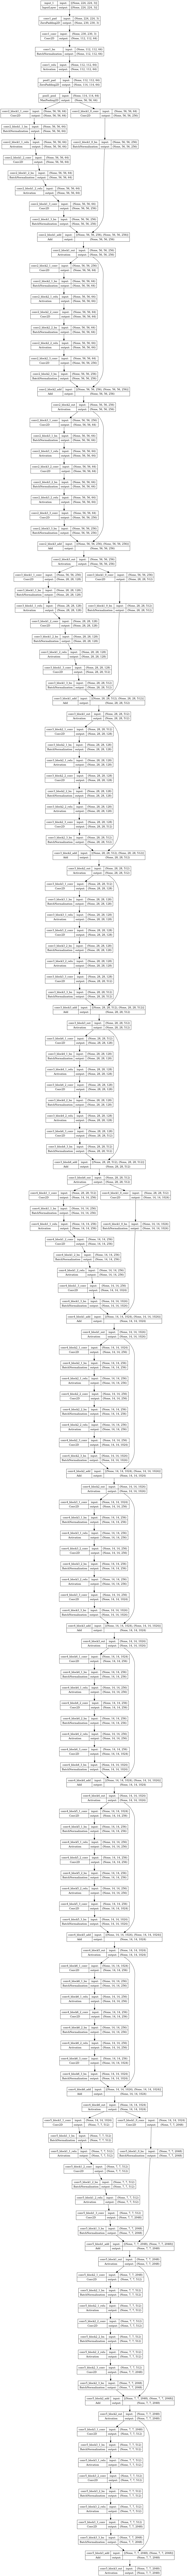

In [14]:
plot_model(ResNet50_model, to_file= 'ResNet50_model.png', show_shapes = True, show_layer_names=True)

In [15]:
ResNet50_model.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [16]:
# Our Tuning
f1=Flatten()(ResNet50_model.output)
final_layer=Dense(58,activation='Softmax')(f1)
final_layer

<KerasTensor: shape=(None, 58) dtype=float32 (created by layer 'dense')>

In [17]:
model=Model(inputs=ResNet50_model.input,outputs=final_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

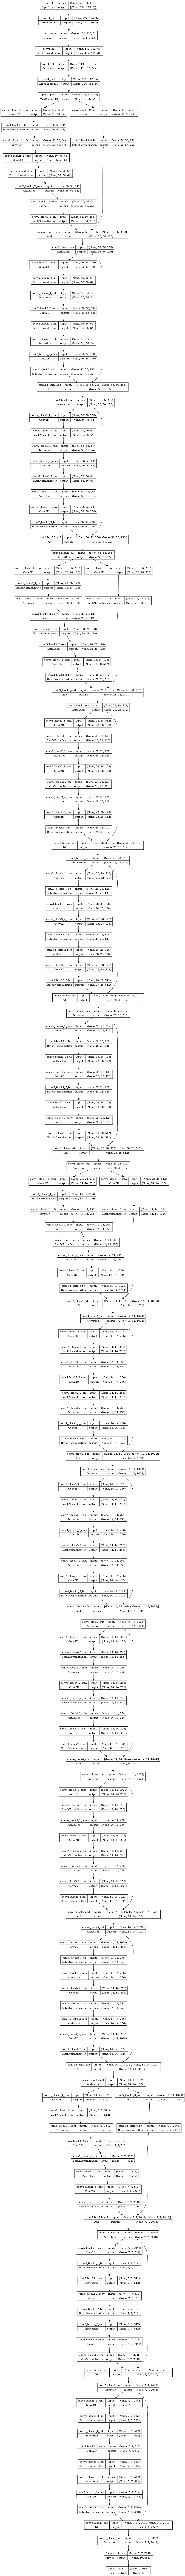

In [18]:
plot_model(model, to_file= 'model.png', show_shapes = True, show_layer_names=True)

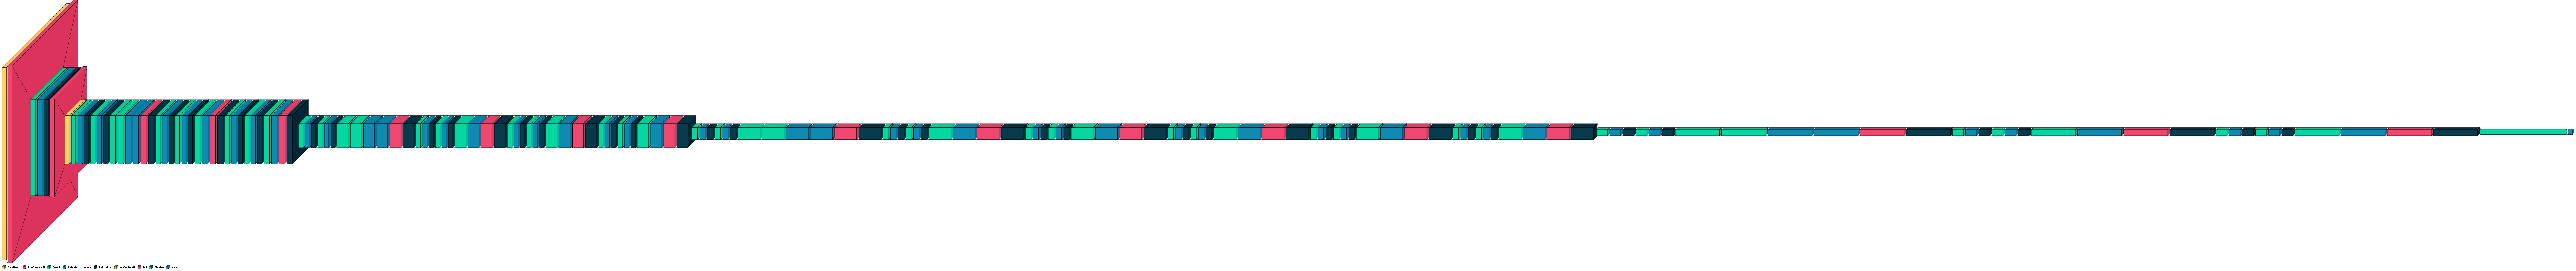

In [19]:
visualkeras.layered_view(model, legend=True)

# Model training

In [20]:
reset_graph(seed=9)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model_training = model.fit_generator(data_train_gen, epochs=10)

Epoch 1/10
1390/1390 [==============================] - 87s 63ms/step - loss: 0.4818 - accuracy: 0.8820
Epoch 2/10
1390/1390 [==============================] - 86s 62ms/step - loss: 0.4570 - accuracy: 0.8863
Epoch 3/10
1390/1390 [==============================] - 87s 62ms/step - loss: 0.4537 - accuracy: 0.8861
Epoch 4/10
1390/1390 [==============================] - 87s 63ms/step - loss: 0.3793 - accuracy: 0.9050
Epoch 5/10
1390/1390 [==============================] - 86s 62ms/step - loss: 0.3862 - accuracy: 0.9134
Epoch 6/10
1390/1390 [==============================] - 85s 61ms/step - loss: 0.3302 - accuracy: 0.9201
Epoch 7/10
1390/1390 [==============================] - 86s 61ms/step - loss: 0.3103 - accuracy: 0.9276
Epoch 8/10
1390/1390 [==============================] - 87s 63ms/step - loss: 0.2935 - accuracy: 0.9329
Epoch 9/10
1390/1390 [==============================] - 87s 62ms/step - loss: 0.3040 - accuracy: 0.9338
Epoch 10/10
1390/1390 [==============================] - 88s 63m

# History

In [23]:
# History
pd.DataFrame(model_training.history)

loss  accuracy
0  0.481787  0.882014
1  0.457020  0.886331
2  0.453736  0.886091
3  0.379307  0.905036
4  0.386173  0.913429
5  0.330175  0.920144
6  0.310345  0.927578
7  0.293546  0.932854
8  0.304013  0.933813
9  0.258821  0.934293

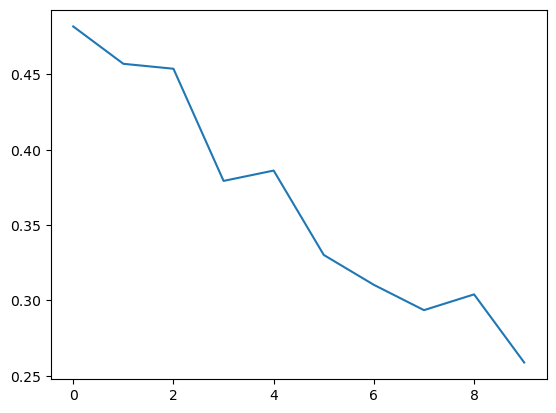

In [26]:
# Plot the Losses
plt.plot(model_training.history['loss'])

# Save the Model

In [28]:
model.save('Traffic_ResNet50_94%.h5')